In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
labels = tips.time.unique()

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips["time"] = pd.Categorical(tips["time"])
tips["time"] = tips["time"].cat.codes
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,1,2
1,10.34,1.66,Male,No,Sun,1,3
2,21.01,3.50,Male,No,Sun,1,3
3,23.68,3.31,Male,No,Sun,1,2
4,24.59,3.61,Female,No,Sun,1,4


In [5]:
X = tips[['total_bill','tip']].values
y = tips.time

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4).fit(X)
centers = model.cluster_centers_
new_labels = model.labels_

C:\Users\ACER\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ACER\Documents\ana\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
print('Centroids :',centers)
print('\nLabels :',new_labels)

Centroids : [[27.35416667  3.81270833]
 [11.56682927  2.04963415]
 [40.41857143  5.04809524]
 [18.46774194  2.95150538]]

Labels : [3 1 3 0 0 0 1 0 1 1 1 2 3 3 1 3 1 3 3 3 3 3 3 2 3 3 1 1 3 3 1 3 3 3 3 0 3
 3 3 0 3 3 1 1 0 3 3 0 0 3 1 1 2 1 0 3 2 0 1 2 3 1 1 3 3 3 3 1 3 1 1 3 0 0
 1 1 3 0 3 3 3 3 1 0 3 2 1 3 0 3 0 3 1 3 3 2 0 1 3 1 1 3 2 3 3 3 3 0 3 1 1
 1 2 0 0 3 0 1 1 0 1 1 1 3 1 0 1 1 1 3 3 3 1 1 3 1 1 1 3 1 3 2 2 0 3 1 3 1
 1 1 1 1 3 0 3 0 2 0 1 3 3 1 3 1 3 0 3 0 1 1 2 3 1 0 3 0 3 1 1 2 2 0 2 0 2
 3 3 0 3 0 3 3 0 3 3 1 1 2 1 1 3 1 1 3 3 3 0 2 0 1 0 0 2 1 0 1 0 1 1 0 1 1
 1 3 1 3 1 3 1 3 0 3 1 1 3 1 1 0 2 0 0 3 3 3]


Text(0.5, 1.0, 'Unclustered Data')

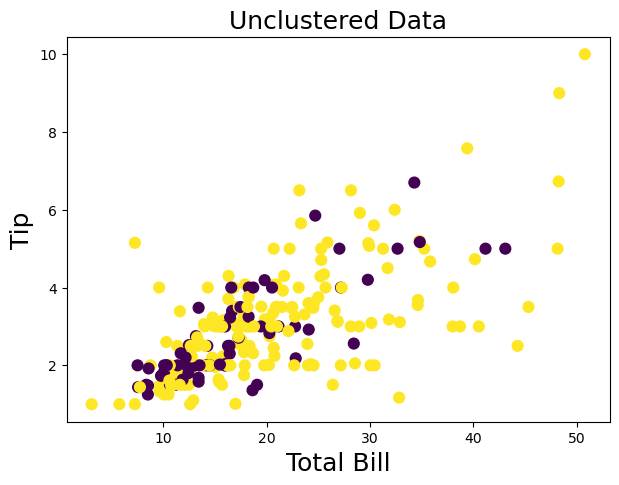

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1],c=y, s=60)
plt.xlabel('Total Bill', fontsize=18)
plt.ylabel('Tip', fontsize=18)
plt.title('Unclustered Data',fontsize=18)

Text(0.5, 1.0, 'Clustered Data')

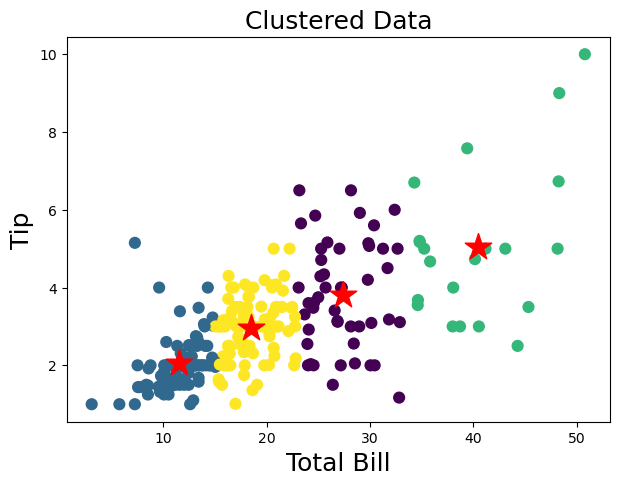

In [12]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=new_labels,s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=400, marker = '*', zorder=10);
plt.xlabel('Total Bill', fontsize=18)
plt.ylabel('Tip', fontsize=18)
plt.title('Clustered Data',fontsize=18)

In [10]:
y_pred = model.predict([[2.3,5.6]])
print("Result :",labels[y_pred[0]])

Result : Lunch
